<a href="https://colab.research.google.com/github/s-jainr/data-science-sp23/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 (HW4)

Deadline: December 1st. Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

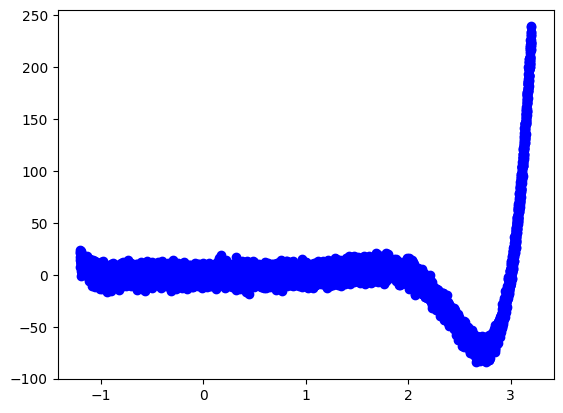

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(0)

def curve_generator(x, sigma=0):
    # y = np.random.normal(x**5 - 5*x**3 + 4*x, sigma)
    y = np.random.normal(x**8 - 5*x**7 + 5*x**6 + 5*x**5 - 6*x**4, sigma)
    return y

X = np.linspace(-1.2, 3.2, 10000)
y = curve_generator(X, sigma=5)

plt.scatter(X, y, c='b')

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

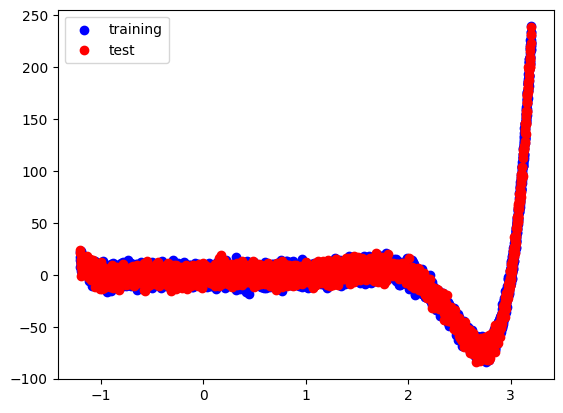

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X_train, y_train, c='b', label='training')
plt.scatter(X_test, y_test, c='r', label='test')
plt.legend()

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>

Text(0.5, 0.01, 'The RMSE value only improves until we reach degree 8, the true degree of the polynomial function')

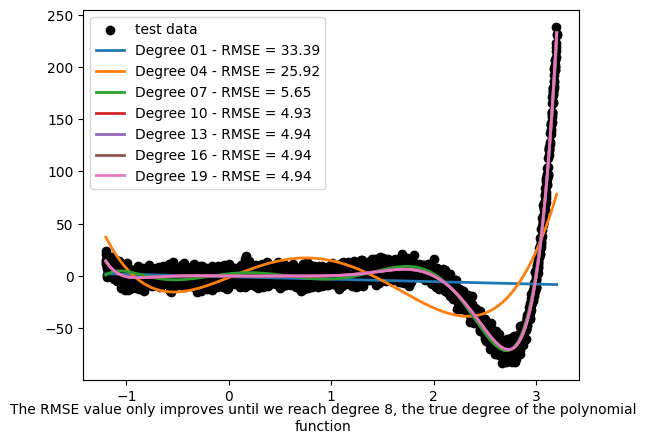

In [284]:
plt.clf()
plt.scatter(X_test, y_test, label='test data', c='black')

for deg in range(1, 22, 3):
  coefs = np.polyfit(X_train, y_train, deg)

  x_vals = np.array([X**i for i in range(deg, 0, -1)] + [1], dtype=object)

  fit_eq = (coefs @ x_vals)

  rmse = np.sqrt(np.sum((fit_eq - y)**2)/len(y))

  plt.plot(X, fit_eq, label=f'Degree {deg:02.0f} - RMSE = {rmse:.02f}', linewidth=2)

plt.legend()

txt= "The RMSE value only improves until we reach degree 8, the true degree of the polynomial function"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)

**c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>

In [285]:
#@title Code for x and y labels on plot below { vertical-output: true }
#@title
def add_headers(fig,*,row_headers=None, col_headers=None, row_pad=1, col_pad=5, 
                rotate_row_headers=True, **text_kwargs):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

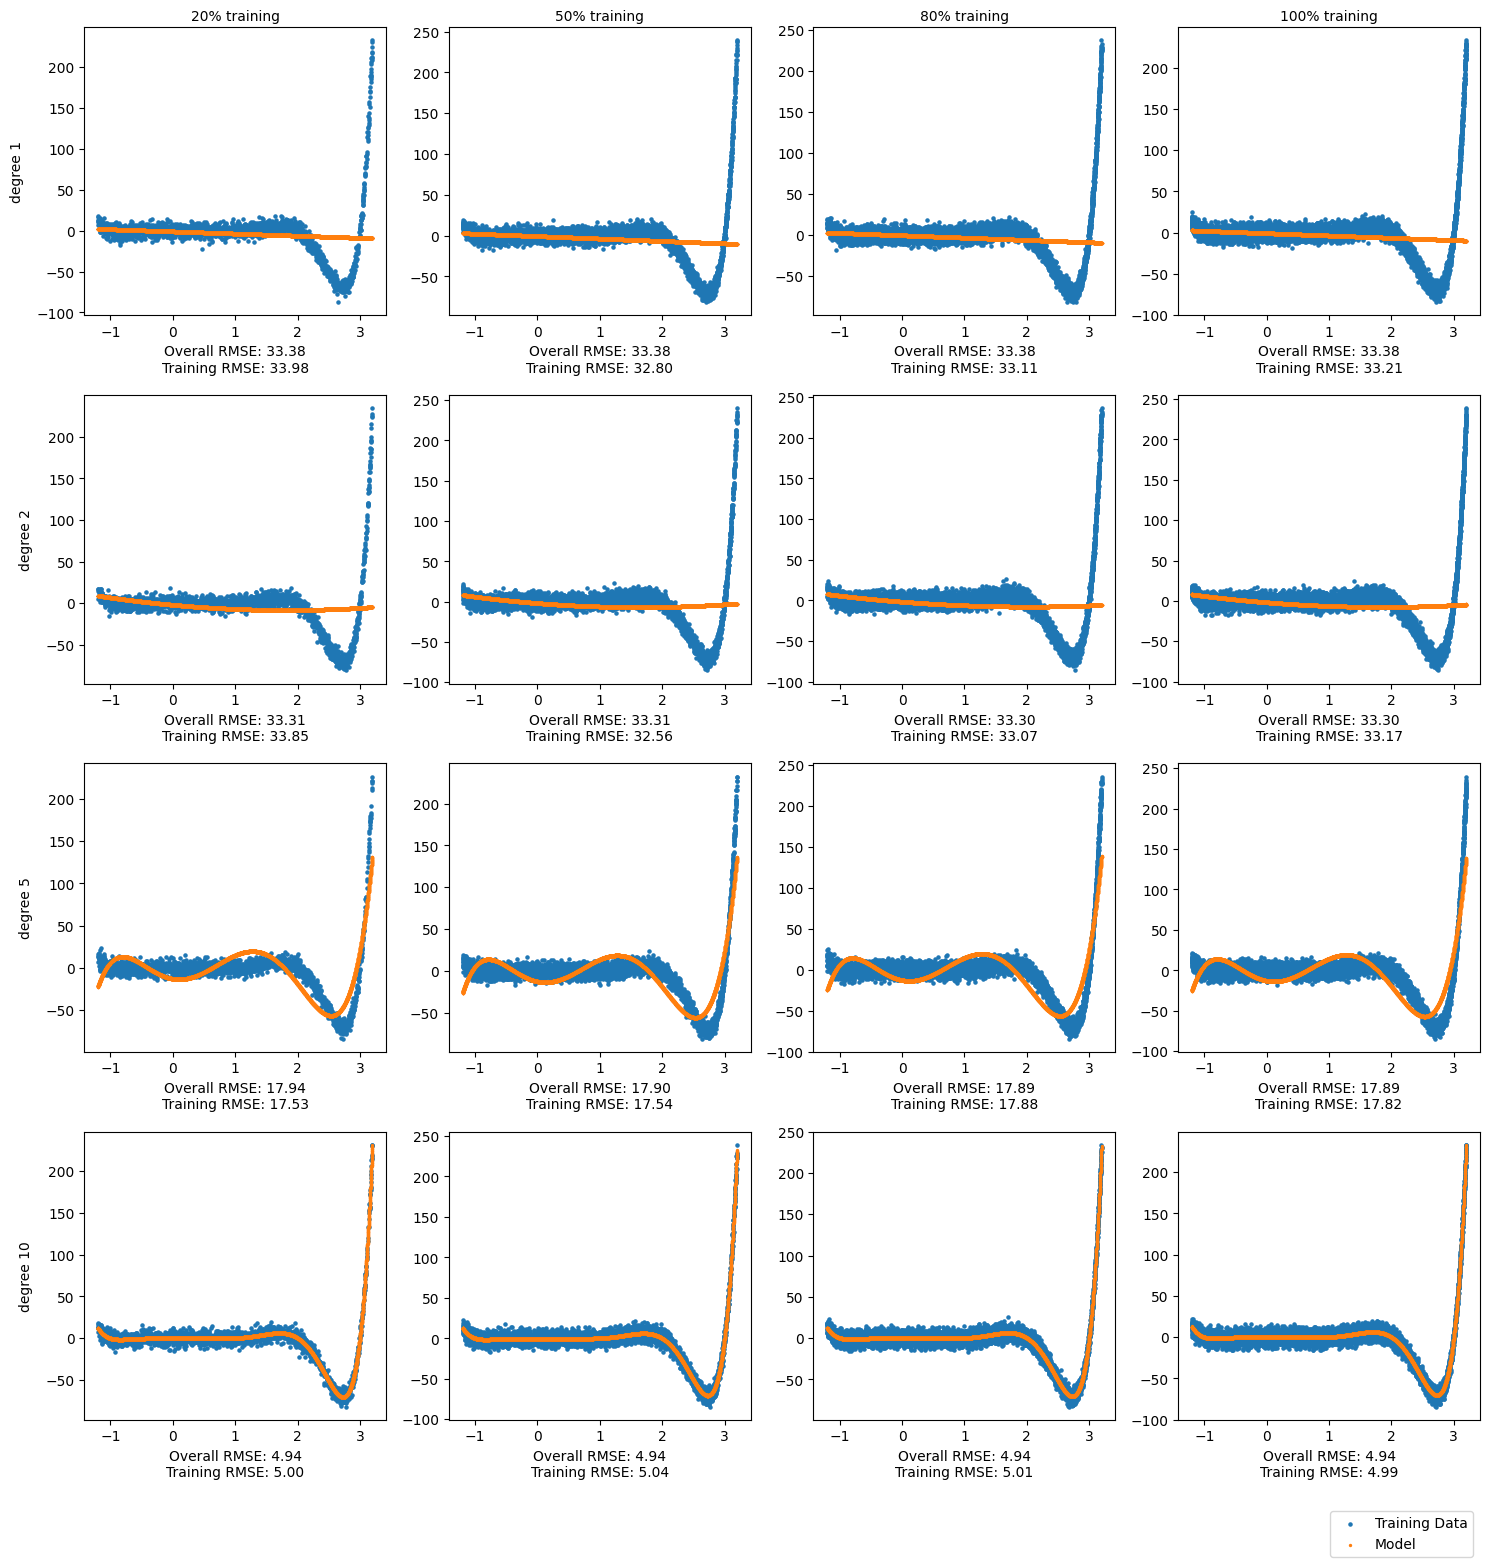

In [289]:
degs = [1, 2, 5, 10]
train_props = [0.2, 0.5, 0.8, 1]

rows = len(degs)
cols = len(train_props)

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize=(15, 15))

add_headers(fig, 
            col_headers=[f"{train_props[i]:.0%} training" for i in range(len(train_props))],
            row_headers=[f"degree {degs[i]}" for i in range(len(degs))])


for i in range(rows):
  for j in range(cols):

    deg = degs[i]
    t_prop = train_props[j]

    train_set = np.array(random.sample(sorted(X), int(len(X)*t_prop)))
    train_data = curve_generator(train_set, sigma=5)
    coefs = np.polyfit(train_set, train_data, deg)

    fit_eq = (coefs @ np.array([X**i for i in range(deg, 0, -1)] + [1], dtype=object))

    rmse_fit = np.sqrt(np.sum((fit_eq - y)**2)/len(y))
    rmse_training = np.sqrt(np.sum(((coefs @ np.array([train_set**i for i in range(deg, 0, -1)] + [1], dtype=object)) - train_data)**2)/len(train_data))

    axs[i, j].scatter(train_set, train_data, s = 5, label='Training Data')
    axs[i, j].scatter(X, fit_eq, s=2, label='Model')
    axs[i, j].set_xlabel(f"Overall RMSE: {rmse_fit:.02f}\nTraining RMSE: {rmse_training:.02f}")

fig.tight_layout()

plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5))

---

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>